In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet', input_shape = (224, 224, 3))
model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n04120489', 'running_shoe', 0.30951825), ('n03223299', 'doormat', 0.14669111), ('n03680355', 'Loafer', 0.104605414)]


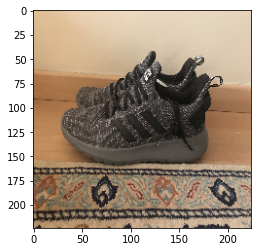

In [ ]:
img_path = 'IMG_2854.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirhosseinasadian","key":"42afafa0c56d6f552a4973fc3d63288c"}'}

In [ ]:
 mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18294  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10961  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5506  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3900  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
!kaggle competitions download -c dogs-vs-cats


 97% 528M/543M [00:02<00:00, 194MB/s]
100% 543M/543M [00:02<00:00, 193MB/s]
 94% 255M/271M [00:01<00:00, 184MB/s]
100% 271M/271M [00:01<00:00, 161MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.7MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
# Constants
image_width = 224
image_height = 224
channels = 3
batch_size = 64
 
# Data directories
train_dir = "train"
test_dir = "test1/"

In [ ]:
# Preparing dataframes
images = os.listdir(train_dir)
categories = []
 
for image in images:
    if "dog" in image:
        categories.append('1')
    else:
        categories.append('0')
df = pd.DataFrame({'image':images, 'label':categories})
 
# Splitting train and validation data
train_df, validation_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [ ]:
# Creating train generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
 
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_dir, 
    x_col="image",
    y_col="label",
    class_mode="binary",
    target_size=(image_height, image_width),
    batch_size=batch_size
)
 
# Creating Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    train_dir, 
    x_col='image',
    y_col='label',
    class_mode='binary',
    target_size=(image_height, image_width),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import SGD
# Loading Model
pretrained_model = VGG16(input_shape=(image_height, image_width, channels), include_top=False, weights="imagenet")
pretrained_model.summary()
 
# Freezing the layers
for layer in pretrained_model.layers[:15]:
    layer.trainable = False
for layer in pretrained_model.layers[15:]:
    layer.trainable = True
 
# Modification of pretrained model
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output
 
x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)
 
# Creating a new model
model = Model(pretrained_model.input, x)
 
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
 
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Training model
n_training_samples = len(train_df)
n_validation_samples = len(validation_df)
 
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=n_validation_samples//batch_size,
    steps_per_epoch=n_training_samples//batch_size,
    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
351/351 [==============================] - 408s 1s/step - loss: 0.3870 - accuracy: 0.8225 - val_loss: 0.1948 - val_accuracy: 0.9211
Epoch 2/10
351/351 [==============================] - 389s 1s/step - loss: 0.2267 - accuracy: 0.9058 - val_loss: 0.1455 - val_accuracy: 0.9407
Epoch 3/10
351/351 [==============================] - 384s 1s/step - loss: 0.1862 - accuracy: 0.9221 - val_loss: 0.1246 - val_accuracy: 0.9495
Epoch 4/10
351/351 [==============================] - 386s 1s/step - loss: 0.1604 - accuracy: 0.9331 - val_loss: 0.1132 - val_accuracy: 0.9531
Epoch 5/10
351/351 [==============================] - 385s 1s/step - loss: 0.1503 - accuracy: 0.9370 - val_loss: 0.1040 - val_accuracy: 0.9587
Epoch 6/10
351/351 [==============================] - 385s 1s/step - loss: 0.1377 - accuracy: 0.9442 - val_loss: 0.1052 - val_accuracy: 0.9567
Epoch 7/10
351/351 [==============================] - 387s 1s/step - loss: 0.1306 - accuracy: 0.9471 - val_loss: 0.0962 - val_accuracy: 0.9571

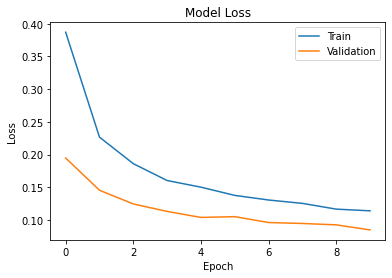

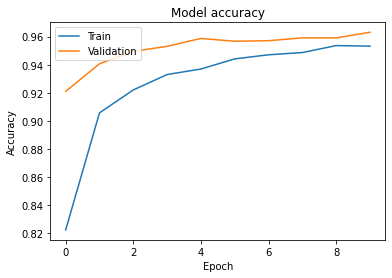

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

def LossAccPlot(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.figure()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

LossAccPlot(history)

In [ ]:
# Preparing test data
test_images = os.listdir(test_dir)
test_df = pd.DataFrame({
    'image': test_images
})
nb_samples = test_df.shape[0]
test_gen = ImageDataGenerator(rescale=1./255)
 
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col='image',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_height, image_width),
    shuffle=False
)
 
# Testing Model
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

Found 12500 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  

test_df.to_csv('out.zip', index=False,
          compression=compression_opts) 

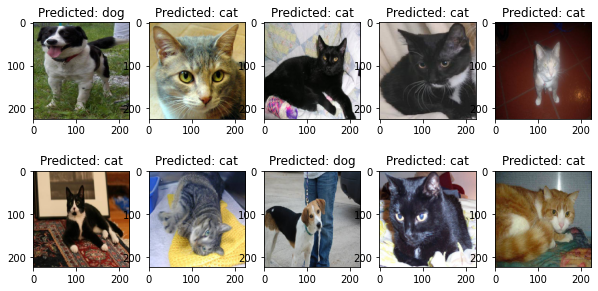

In [ ]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(10, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  img = image.load_img(test_df['image'][i], target_size=(224, 224))
  plt.imshow(img)
  title = 'Predicted: dog' if test_df['category'][i] == 1 else 'Predicted: cat'
  plt.title(title)